In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("/datasets/gym_churn_us.csv")

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# Verificar informações gerais
print("--- Info ---")
print(df.info())

# Verificar valores ausentes
print("--- Valores ausentes ---")
print(df.isnull().sum())

# Estatísticas descritivas
print("--- Estatísticas descritivas ---")
print(df.describe())

# Médias por grupo (churn ou não)
print("--- Médias por grupo de Churn ---")
print(df.groupby('Churn').mean(numeric_only=True))



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non

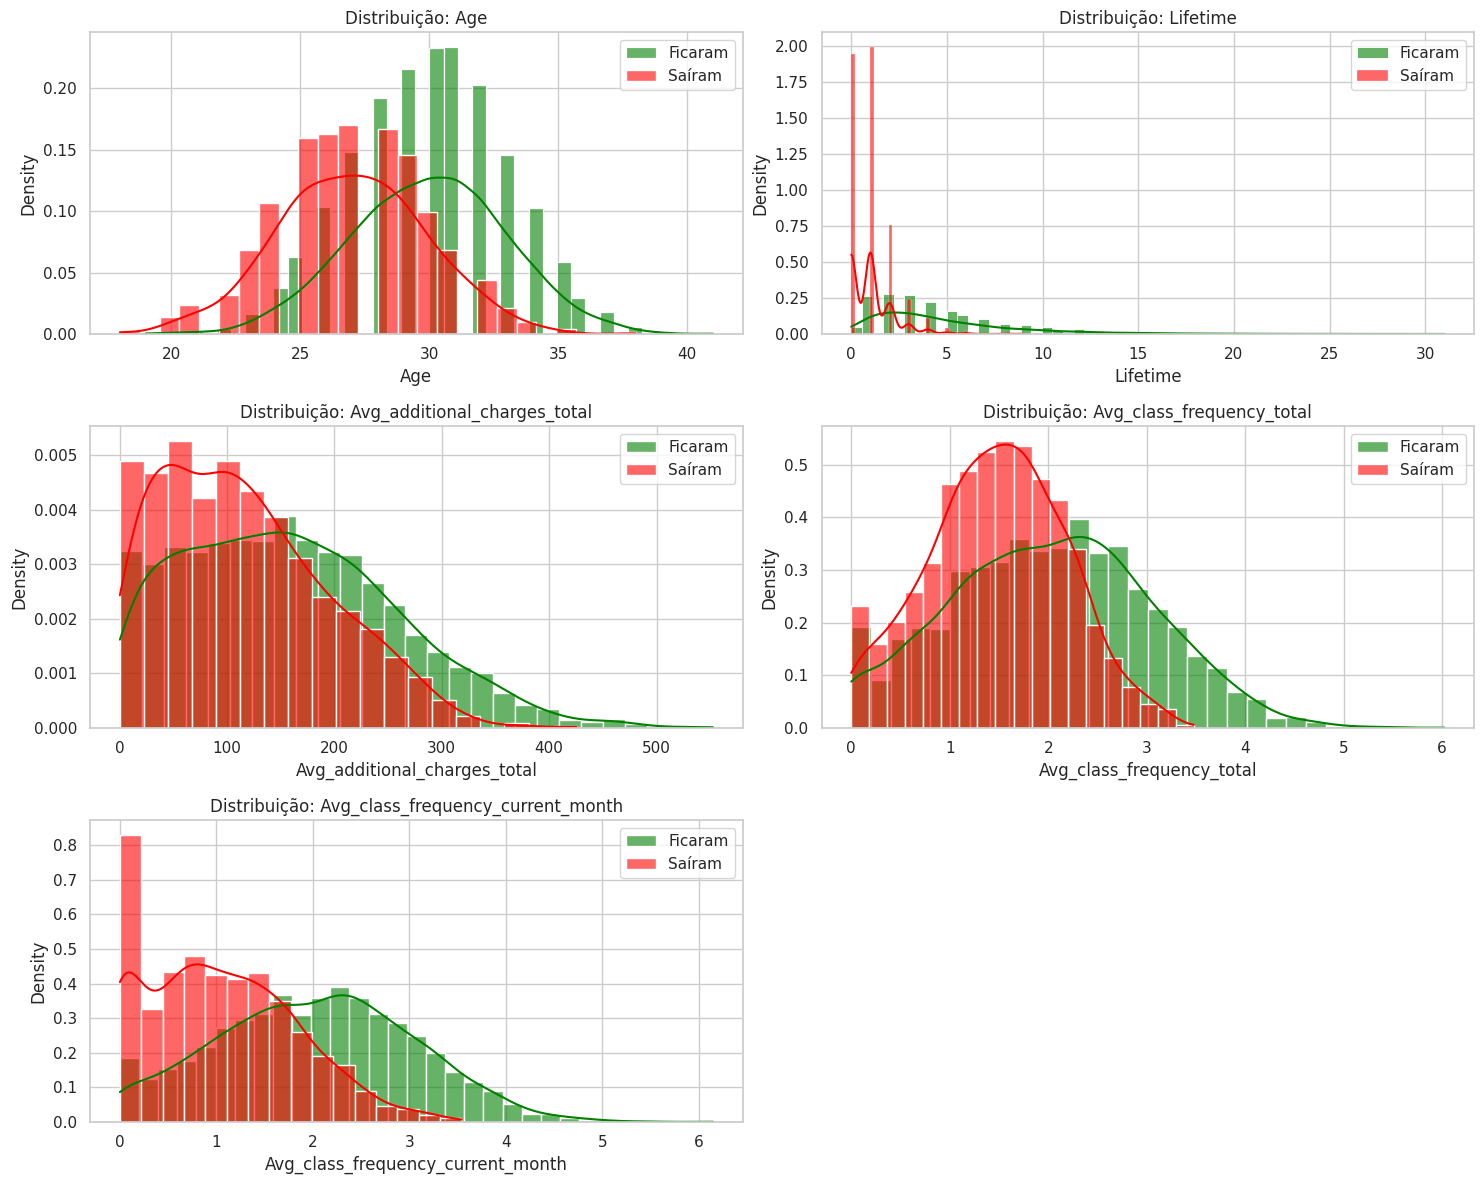

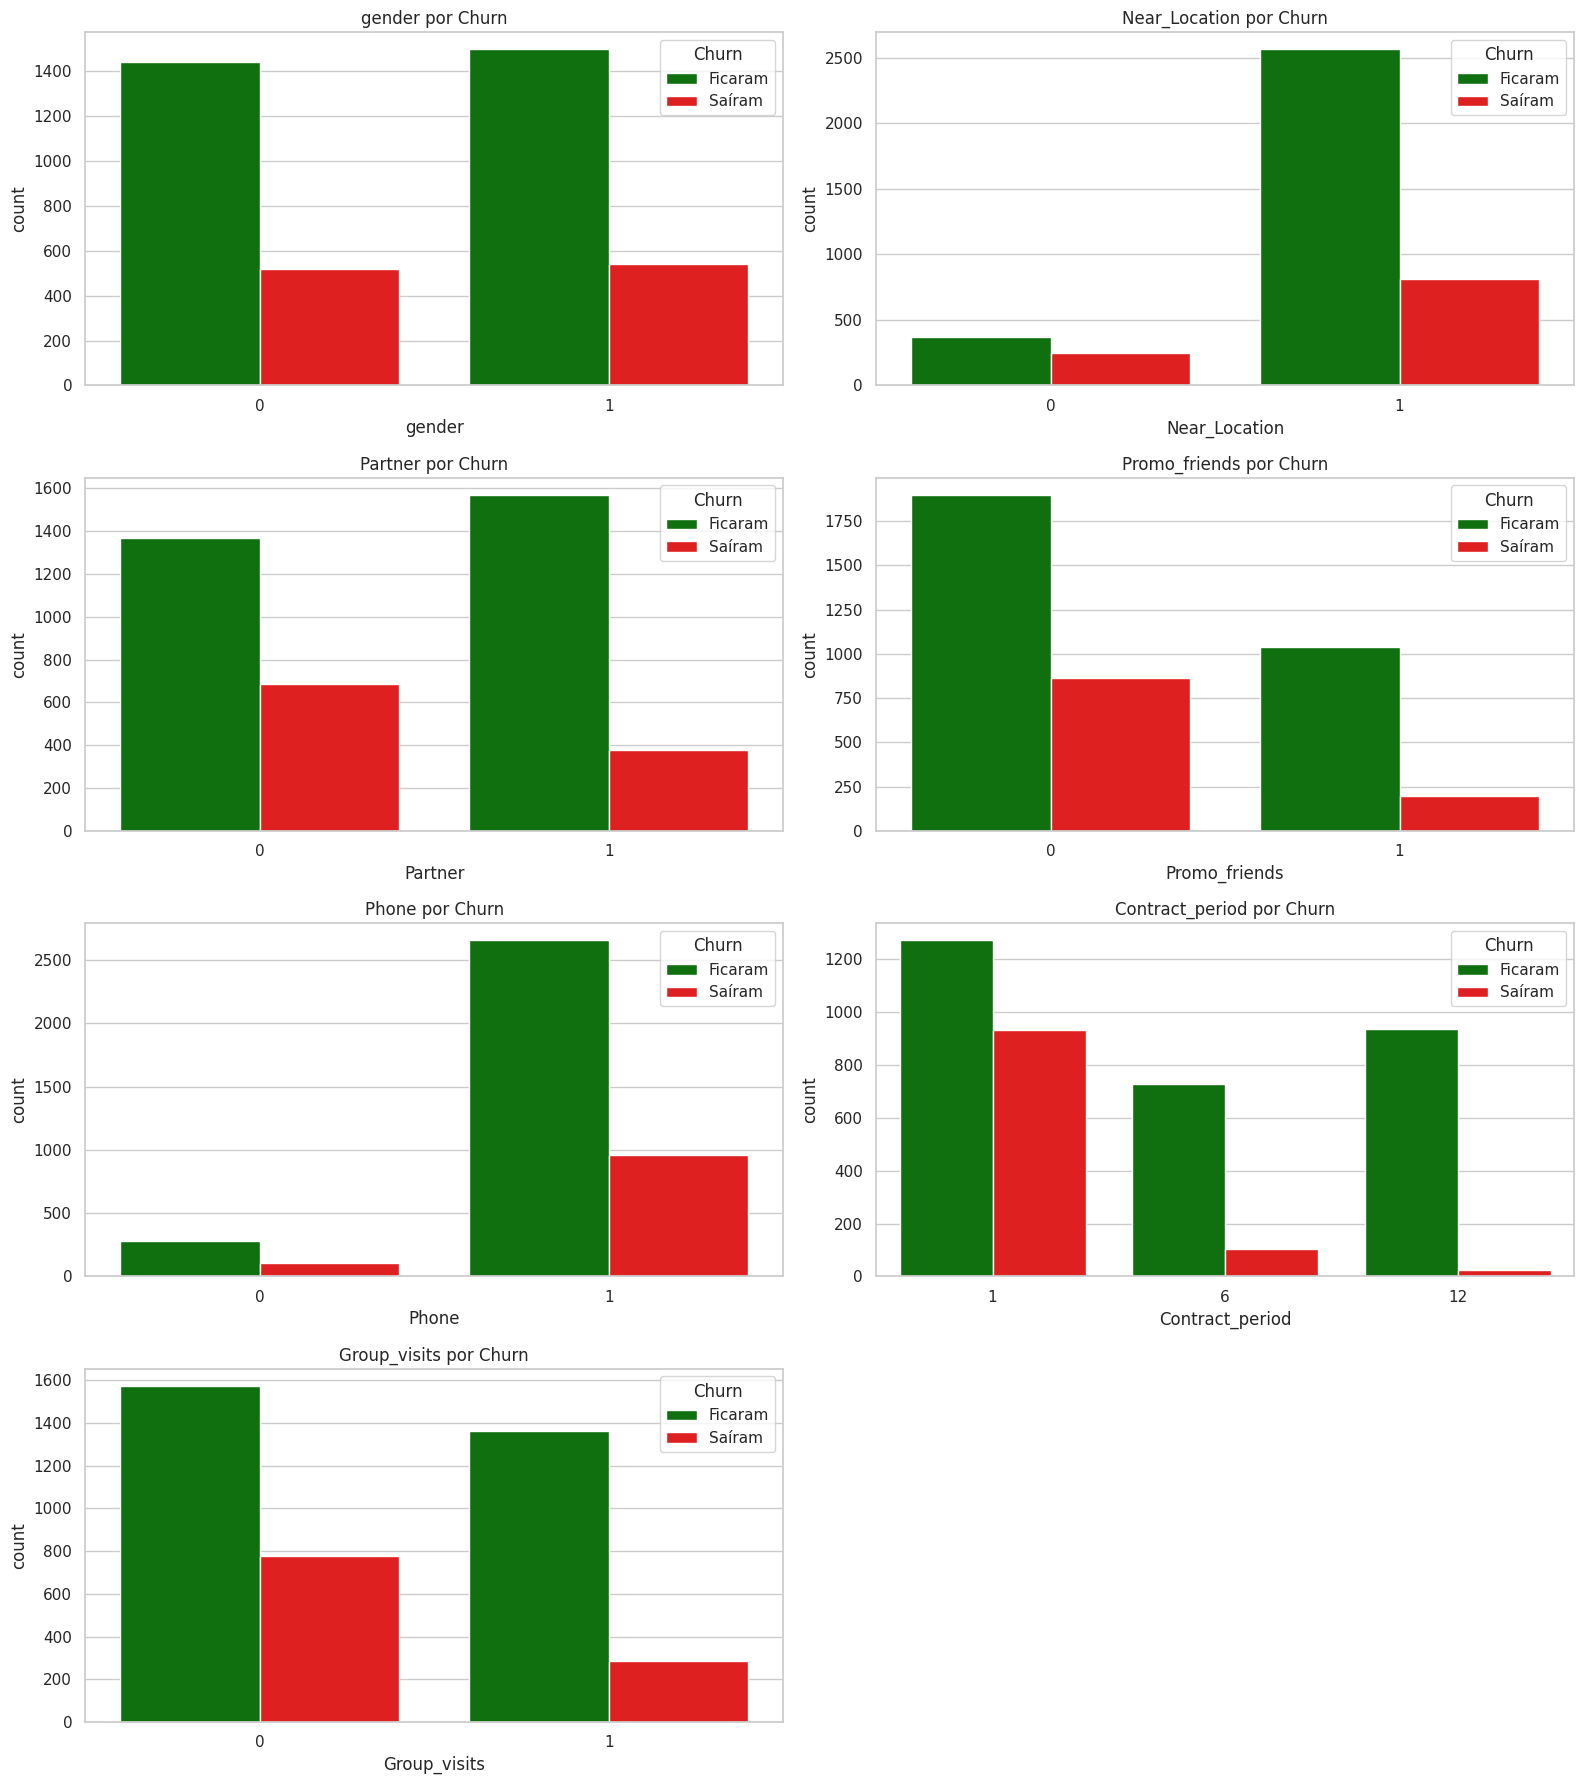

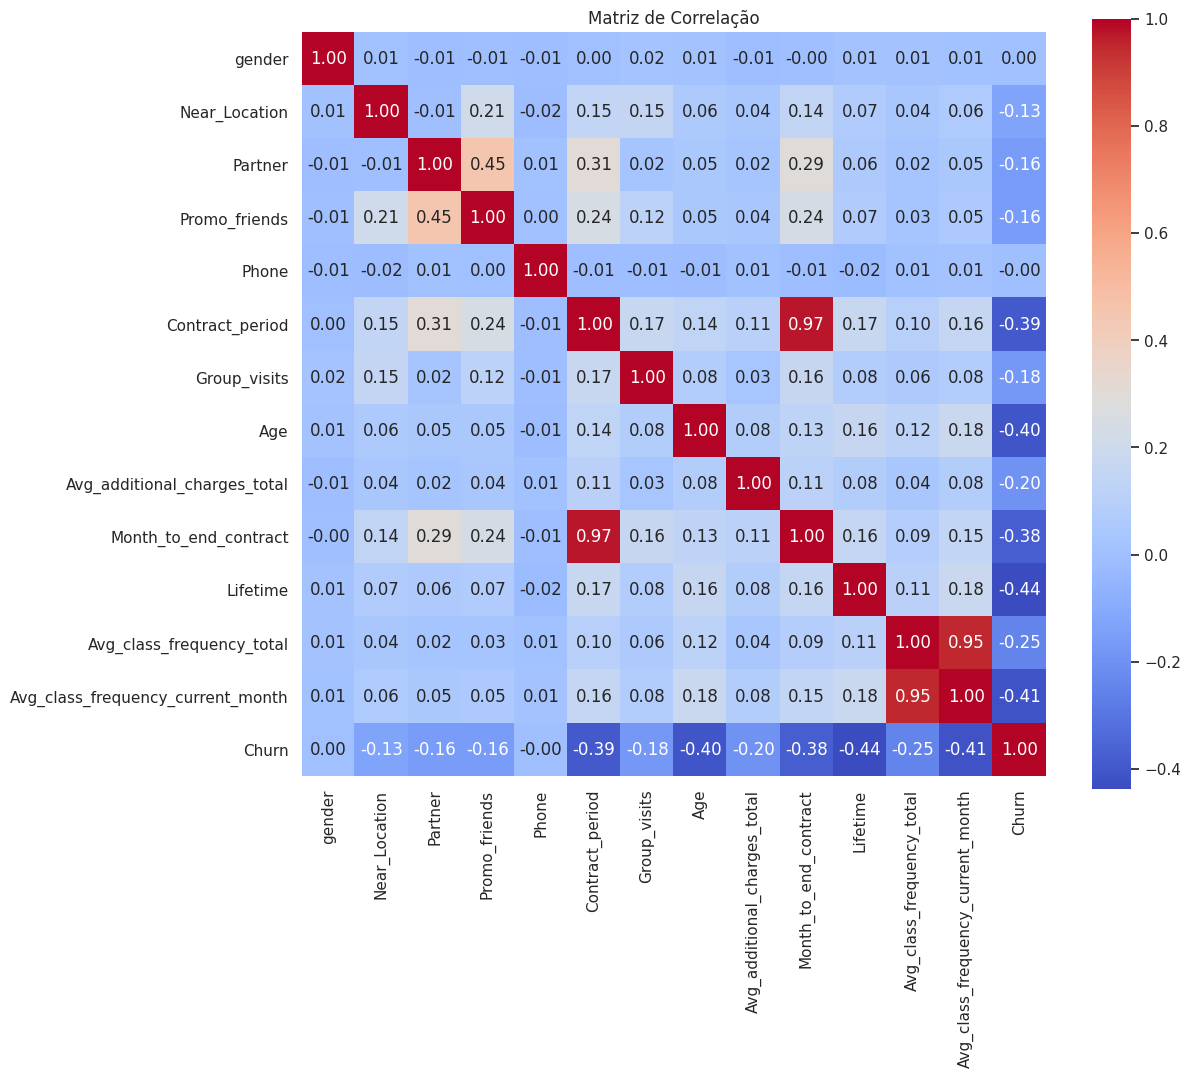

In [5]:
# Histogramas comparando churn e não churn para variáveis numéricas
sns.set(style="whitegrid")
numeric_cols = [
    "Age", "Lifetime", "Avg_additional_charges_total",
    "Avg_class_frequency_total", "Avg_class_frequency_current_month"
]

df_churn_0 = df[df["Churn"] == 0]
df_churn_1 = df[df["Churn"] == 1]

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_churn_0[col], kde=True, label="Ficaram", color="green", stat="density", alpha=0.6)
    sns.histplot(df_churn_1[col], kde=True, label="Saíram", color="red", stat="density", alpha=0.6)
    plt.title(f"Distribuição: {col}")
    plt.legend()
plt.tight_layout()
plt.show()

# Gráficos de barras para variáveis categóricas
categorical_cols = [
    "gender", "Near_Location", "Partner", "Promo_friends",
    "Phone", "Contract_period", "Group_visits"
]

plt.figure(figsize=(16, 18))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=col, hue="Churn", data=df, palette={0: "green", 1: "red"})
    plt.title(f"{col} por Churn")
    plt.legend(title='Churn', labels=['Ficaram', 'Saíram'])
plt.tight_layout()
plt.show()

# Matriz de correlação
corr_matrix = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação")
plt.show()


===== Regressão Logística =====
Acurácia: 0.918
Precisão: 0.8645
Recall: 0.8189
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       735
           1       0.86      0.82      0.84       265

    accuracy                           0.92      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.92      0.92      0.92      1000


===== Floresta Aleatória =====
Acurácia: 0.919
Precisão: 0.877
Recall: 0.8075
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       735
           1       0.88      0.81      0.84       265

    accuracy                           0.92      1000
   macro avg       0.90      0.88      0.89      1000
weighted avg       0.92      0.92      0.92      1000



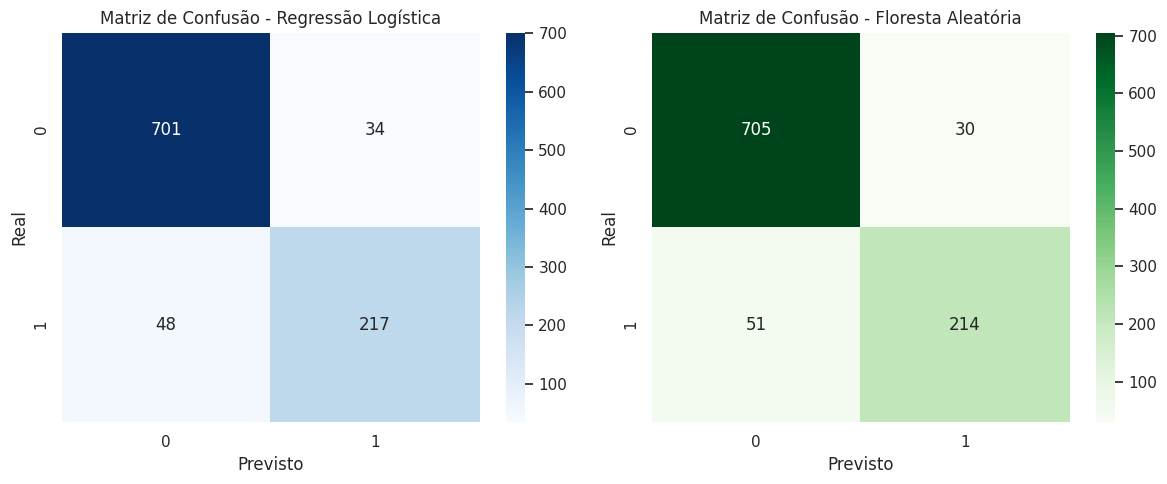

In [6]:
# Separar variáveis preditoras e alvo
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Codificar variáveis categóricas (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Divisão em conjunto de treino e validação
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ---------------------
# Regressão Logística
# ---------------------
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_valid)

# ---------------------
# Floresta Aleatória
# ---------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_valid)

# ---------------------
# Avaliação dos modelos
# ---------------------

# Função auxiliar para imprimir métricas
def print_metrics(model_name, y_true, y_pred):
    print(f"\n===== {model_name} =====")
    print("Acurácia:", round(accuracy_score(y_true, y_pred), 4))
    print("Precisão:", round(precision_score(y_true, y_pred), 4))
    print("Recall:", round(recall_score(y_true, y_pred), 4))
    print("Relatório de Classificação:")
    print(classification_report(y_true, y_pred))

# Avaliar ambos
print_metrics("Regressão Logística", y_valid, y_pred_log)
print_metrics("Floresta Aleatória", y_valid, y_pred_rf)

# ---------------------
# Matriz de confusão
# ---------------------
plt.figure(figsize=(12, 5))

# Logística
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_valid, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")

# Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_valid, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - Floresta Aleatória")
plt.xlabel("Previsto")
plt.ylabel("Real")

plt.tight_layout()
plt.show()

Médias por cluster:            gender  Near_Location   Partner  Promo_friends  Phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                                                  

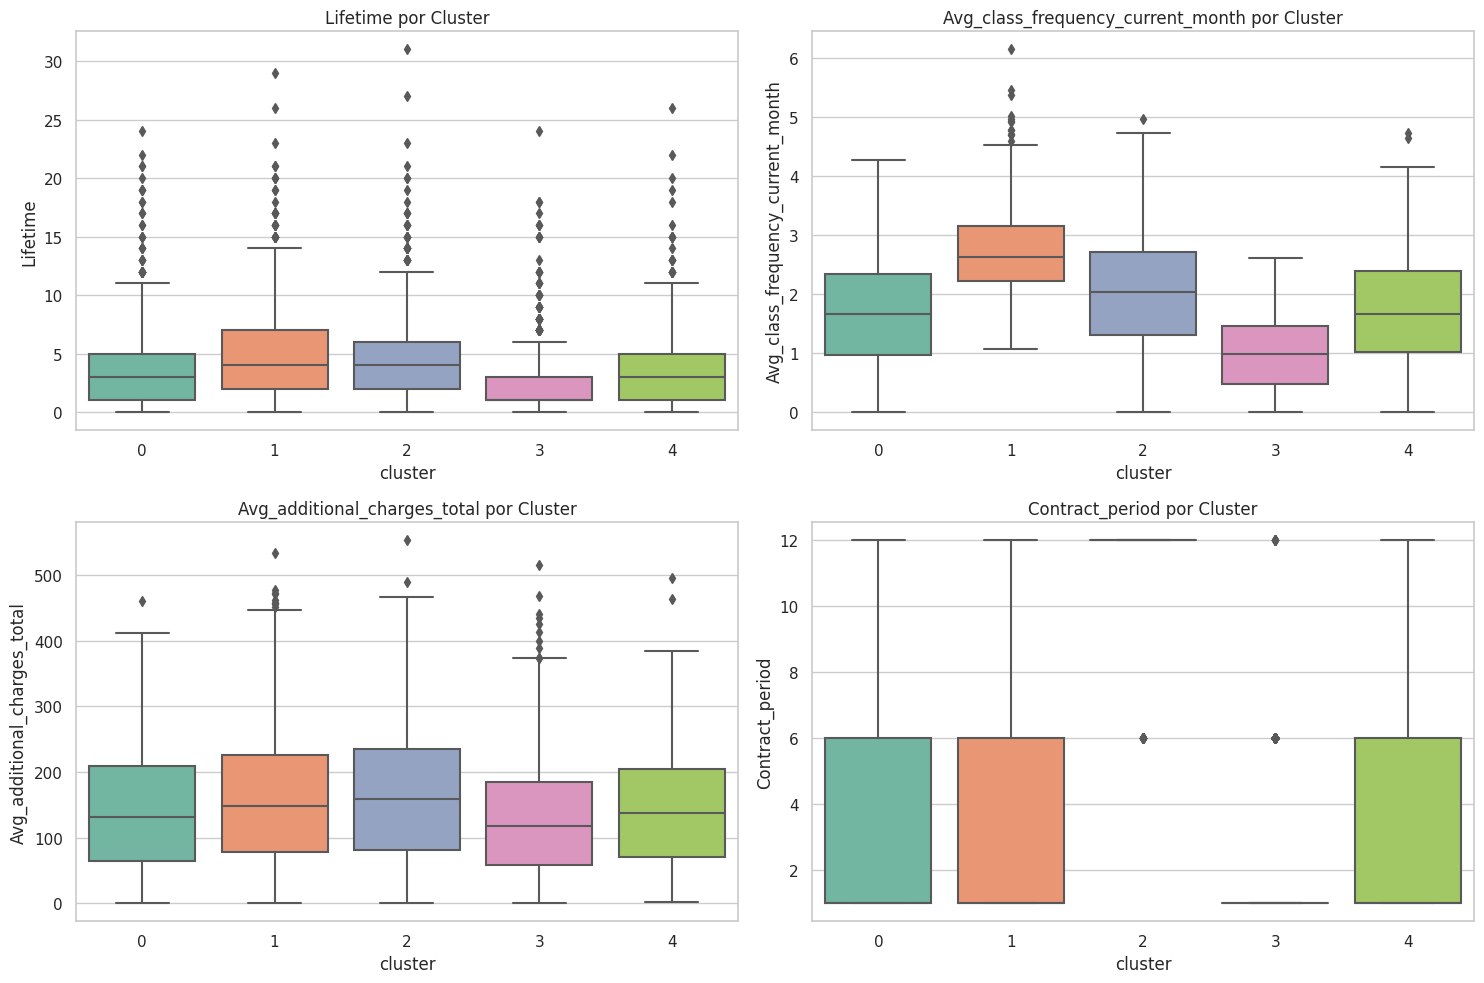

In [7]:
# Pré-processamento
features = df.drop(columns=["Churn"])
features_encoded = pd.get_dummies(features, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_encoded)

# Modelo K-Means com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Estatísticas médias por cluster
cluster_means = df.groupby("cluster").mean(numeric_only=True)
print("Médias por cluster:", cluster_means)

# Taxa de rotatividade por cluster
cluster_churn = df.groupby("cluster")["Churn"].mean()
print("Taxa de rotatividade por cluster:", cluster_churn)

# Visualização das distribuições por cluster
plt.figure(figsize=(15, 10))
cols_to_plot = ["Lifetime", "Avg_class_frequency_current_month", "Avg_additional_charges_total", "Contract_period"]
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="cluster", y=col, data=df, palette="Set2")
    plt.title(f"{col} por Cluster")
plt.tight_layout()
plt.show()

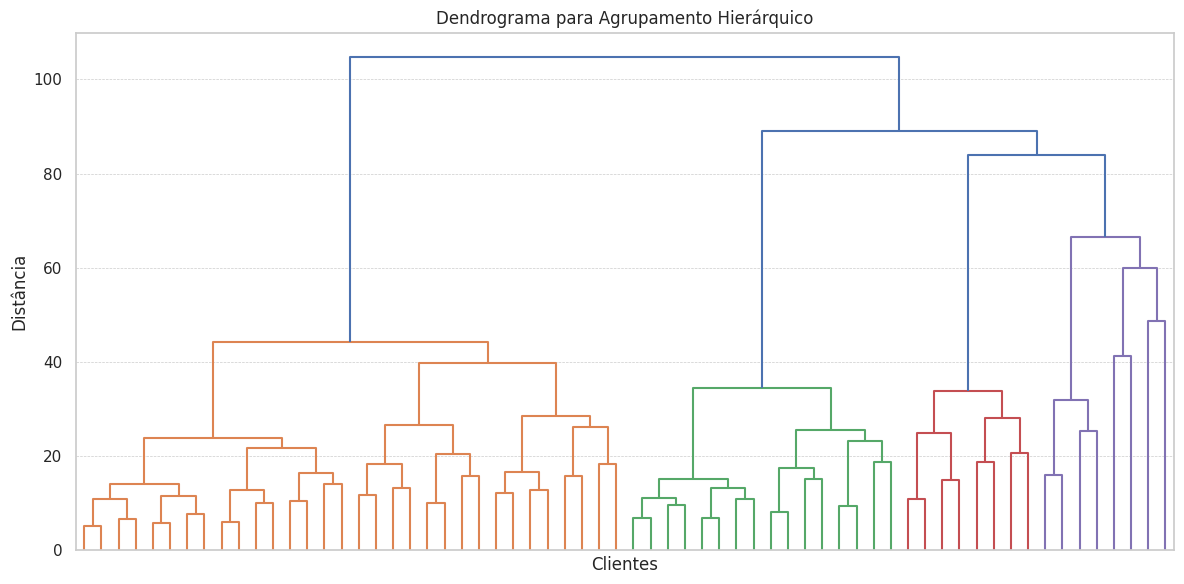

In [8]:
# 4.2 Construir matriz de distâncias e dendrograma
linked = linkage(X_scaled, method='ward')

# Plot do dendrograma truncado para facilitar visualização (sem todas as folhas)
plt.figure(figsize=(12, 6))
dendrogram(linked,
           truncate_mode='level',  # mostra apenas os primeiros níveis
           p=5,                    # exibe até 5 agrupamentos principais
           show_leaf_counts=False,
           no_labels=True,
           color_threshold=None)  # colorir automaticamente por distância
plt.title('Dendrograma para Agrupamento Hierárquico')
plt.xlabel('Clientes')
plt.ylabel('Distância')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Conclusões e Recomendações para Redução da Rotatividade

A análise dos dados de clientes da academia permitiu identificar padrões e comportamentos associados à rotatividade. Abaixo estão os principais insights e ações recomendadas:

---

## 1. Baixa frequência recente = alto risco de saída
- **Insight:** Clientes com queda na frequência de visitas no mês atual tendem a sair.
- **Ação de marketing:** Automatizar mensagens de reengajamento (e-mail/SMS) para clientes inativos nas últimas 2 semanas.

---

## 2. Planos curtos (1 mês) aumentam a rotatividade
- **Insight:** Planos mensais têm taxa de churn significativamente maior.
- **Ação de marketing:** Oferecer **descontos progressivos** ou **benefícios exclusivos** para migração para planos trimestrais ou anuais.

---

## 3. Atividades em grupo e indicações reduzem churn
- **Insight:** Participação em `Group_visits` e `Promo_friends` está associada a maior fidelização.
- **Ação de marketing:** Reforçar programas de indicação e criar aulas temáticas para grupos de amigos.

---

## 4. Clusters de alto risco identificados
- **Insight:** Segmentos com baixa frequência, baixo gasto adicional e contratos curtos têm maior churn.
- **Ação de marketing:** Criar campanhas personalizadas para esses grupos (ex: combo promocional limitado com aula + café + massagem).

---

**Resumo:** Foque em reter clientes com baixa frequência, incentive contratos longos, fortaleça os laços sociais (grupos e amigos) e direcione ações específicas para clusters de risco.
